In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [5]:
df = pd.read_excel('Online_Retail.xlsx')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
InvoiceDate = df['InvoiceDate']

In [17]:
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month


In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12


In [107]:
df['total_price']=df['UnitPrice']*df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34


In [246]:
#products with maximum revenue
by_stock_code_3 = df.groupby('StockCode')
by_stock_code_3_idx=by_stock_code_3.sum().sort_values(by=['total_price'],ascending=False)[:3].index
df_uk=df[df['Country']=='United Kingdom']
df_uk.head()
for stock_code in by_stock_code_3_idx:
    #print(stock_code)
    monthNo=df_uk[df_uk['StockCode']==stock_code].groupby('month').sum()['total_price'].idxmax()
    month = datetime.date(1900, monthNo, 1).strftime('%B')
    print(f"Best time to sell {stock_code} in United Kingdom is : {month}")
    

Best time to sell DOT in United Kingdom is : December
Best time to sell 22423 in United Kingdom is : December
Best time to sell 47566 in United Kingdom is : May


In [218]:
#products with maximum revenue
by_stock_code = df.groupby('StockCode')
by_stock_code=by_stock_code.sum()
by_stock_code['total_price'].sort_values(ascending=False)[:10]

StockCode
DOT       206245.48
22423     164762.19
47566      98302.98
85123A     97894.50
85099B     92356.03
23084      66756.59
POST       66230.64
22086      63791.94
84879      58959.73
79321      53768.06
Name: total_price, dtype: float64

In [213]:
#percentage of revenue for top 10 products
by_stock_code['total_price'].sort_values(ascending=False)[:10]/(sum(df['total_price']))*100

StockCode
DOT       2.115827
22423     1.690259
47566     1.008469
85123A    1.004278
85099B    0.947460
23084     0.684841
POST      0.679446
22086     0.654427
84879     0.604855
79321     0.551595
Name: total_price, dtype: float64

In [174]:
#top 5 and bottom 5 revenue generating countries
by_country = df.groupby('Country').sum()
print("Bottom 5:\t", by_country['total_price'].sort_values()[:5])
print("Top 5: \t", by_country['total_price'].sort_values()[-5:])

Bottom 5:	 Country
Saudi Arabia       131.17
Bahrain            548.40
Czech Republic     707.72
RSA               1002.31
Brazil            1143.60
Name: total_price, dtype: float64
Top 5: 	 Country
France            1.974039e+05
Germany           2.216982e+05
EIRE              2.632768e+05
Netherlands       2.846615e+05
United Kingdom    8.187806e+06
Name: total_price, dtype: float64


In [167]:
#month in which most revenue is generated
by_month=df.groupby('month').sum()
by_month['total_price'].idxmax()

month
1      560000.260
2      498062.650
3      683267.080
4      493207.121
5      723333.510
6      691123.120
7      681300.111
8      682680.510
9     1019687.622
10    1070704.670
11    1461756.250
12    1182625.030
Name: total_price, dtype: float64

<AxesSubplot:title={'center':'Quaterly Earning for the year 2011 (in millions)'}>

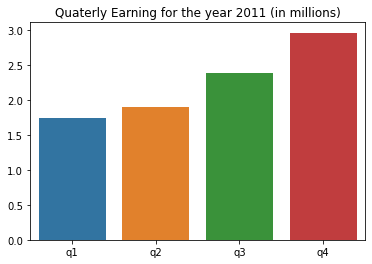

In [150]:
df_qt_2011 = dict()
df_qt_2011['q1']=df[(df['year']==2011) & (df['month']<=3)]['total_price'].sum()/10**6
df_qt_2011['q2']=df[(df['year']==2011) & (df['month']>3) & (df['month']<=6)]['total_price'].sum()/10**6
df_qt_2011['q3']=df[(df['year']==2011) & (df['month']>6) & (df['month']<=9)]['total_price'].sum()/10**6
df_qt_2011['q4']=df[(df['year']==2011) & (df['month']>9) & (df['month']<=12)]['total_price'].sum()/10**6
df_qt_2011 = pd.Series(data=df_qt_2011)
plt.title('Quaterly Earning for the year 2011 (in millions)')
sns.barplot(x=df_qt_2011.index,y=df_qt_2011.values)


<AxesSubplot:title={'center':'Quaterly Earning for the year 2010 (in millions)'}>

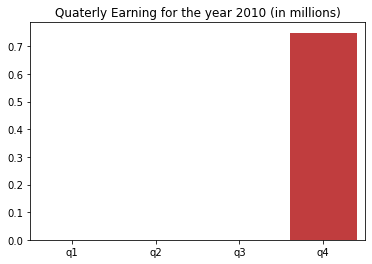

In [151]:
df_qt_2010 = dict()
df_qt_2010['q1']=df[(df['year']==2010) & (df['month']<=3)]['total_price'].sum()
df_qt_2010['q2']=df[(df['year']==2010) & (df['month']>3) & (df['month']<=6)]['total_price'].sum()
df_qt_2010['q3']=df[(df['year']==2010) & (df['month']>6) & (df['month']<=9)]['total_price'].sum()
df_qt_2010['q4']=df[(df['year']==2010) & (df['month']>9) & (df['month']<=12)]['total_price'].sum()/10**6
df_qt_2010 = pd.Series(data=df_qt_2010)
plt.title('Quaterly Earning for the year 2010 (in millions)')
sns.barplot(x=df_qt_2010.index,y=df_qt_2010.values)



In [119]:
#average quaterly revenue in the year 2010
(df[df['year']==2010]['total_price'].sum())/4

187239.25499999998

<AxesSubplot:title={'center':'Only once visited customer - Country-wise'}, ylabel='count'>

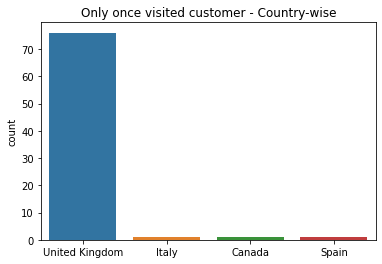

In [102]:
srr=df['CustomerID'].value_counts()==1
srr=srr[srr==True]
dt=dict()
tempdf = df[['CustomerID','Country']].set_index('CustomerID')
for x in srr.index:
    dt[x]=tempdf.loc[x]['Country']
plt.title("Only once visited customer - Country-wise")
sns.countplot(x=pd.Series(data=dt),data=pd.Series(data=dt))

In [42]:
#number of customer who have visited only once 
sum(df['CustomerID'].value_counts()==1)

79

<AxesSubplot:title={'center':'Customer count : Year Wise'}, xlabel='year', ylabel='count'>

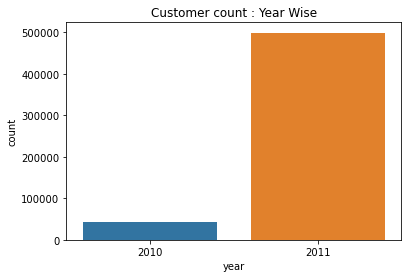

In [104]:
#plot customer count year-wise
plt.title('Customer count : Year Wise')
sns.countplot(x='year',data=df)

<AxesSubplot:title={'center':'Customer Count - Month Wise'}, xlabel='month', ylabel='count'>

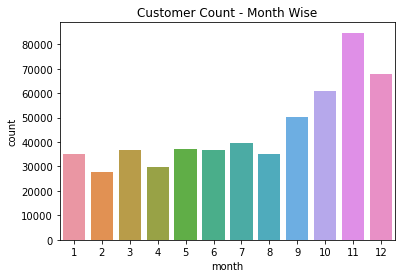

In [105]:
#plot customer count month-wise
plt.title('Customer Count - Month Wise')
sns.countplot(x='month',data=df)

<AxesSubplot:title={'center':'Customer Count - Country Wise'}, xlabel='Country', ylabel='count'>

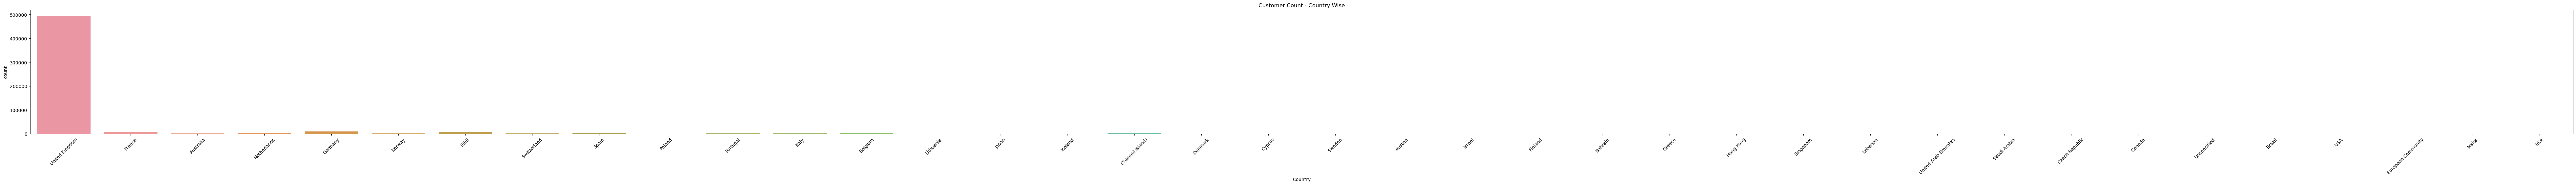

In [106]:
plt.figure(figsize=(100,5),dpi=100)
plt.xticks(rotation=45)
plt.title('Customer Count - Country Wise')
sns.countplot(x='Country',data=df)